<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understanding-Linear-Regression" data-toc-modified-id="Understanding-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understanding Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Basics" data-toc-modified-id="Basics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basics</a></span></li><li><span><a href="#Little-Bit-of-Math-😒" data-toc-modified-id="Little-Bit-of-Math-😒-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Little Bit of Math 😒</a></span></li></ul></li><li><span><a href="#Finding-the-Coefficients" data-toc-modified-id="Finding-the-Coefficients-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Finding the Coefficients</a></span><ul class="toc-item"><li><span><a href="#Error" data-toc-modified-id="Error-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Error</a></span><ul class="toc-item"><li><span><a href="#Classical-Error-function" data-toc-modified-id="Classical-Error-function-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Classical Error function</a></span></li><li><span><a href="#Mean-Squared-Error" data-toc-modified-id="Mean-Squared-Error-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Mean Squared Error</a></span></li></ul></li><li><span><a href="#Optimisation" data-toc-modified-id="Optimisation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Optimisation</a></span></li><li><span><a href="#Understanding-using-Graphs" data-toc-modified-id="Understanding-using-Graphs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Understanding using Graphs</a></span><ul class="toc-item"><li><span><a href="#Impact-of-Iterations-in-prediction-accuracy" data-toc-modified-id="Impact-of-Iterations-in-prediction-accuracy-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Impact of Iterations in prediction accuracy</a></span></li><li><span><a href="#Loss-Function-Vs-Value" data-toc-modified-id="Loss-Function-Vs-Value-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Loss Function Vs Value</a></span></li><li><span><a href="#Loss-Function-Vs-Iterations" data-toc-modified-id="Loss-Function-Vs-Iterations-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Loss Function Vs Iterations</a></span></li></ul></li></ul></li></ul></div>

# Understanding Linear Regression

The linear regression is the basic building block algorithm for most Machine learning algorithms. It is the simplest machine learning algorithm used for both regression and classification problems. It is used as a building block for most complicated architectures like Neural Network, Convolution Neural Network and Recurrent Neural Network. Hence having a basic understanding for it will give us a great overview of how complicated machine learning architectures are built upon.

## Basics

For Machine Learning to happen, we need 3 groups of datasets, synonymous to a student learning maths:
- Training Set: The data that we use to teach the machine (Text Book questions)
- Test Set: The data that we use to test if it understood correctly (The Exam Paper)
- Real World Set: The Real world example of using the learned skill.

Lets take an example of the training set say centuries vs auction price. Its fairly obvious that if you have scored more centuries, you are a great player and hence you'll be bought for more price. Lets see how the machine learns this fact and how it could predict the auction price.  

| Centuries | Auction Price |
|------|-------|
| 2 | 200,000 |
| 3 | 330,000 |
| 5 | 450,000 |
| 6 | 610,000 |
| 7 | 750,000 |

Now we are making our student (Machine) understand the above table. But how could we do that. Lets see..

## Little Bit of Math 😒

Let's take *Centuries scored* as the `x` variable and *Auction Price* as `y` variable or the variable to be predicted. The price of a player will be based on the number of centuries, they scored. However, there is a fair say that there would be a base price even which doesn't depend on the number of centuries.

Lets say that we would like to fit this to a variable 
\begin{equation}
y=a*x+b
\end{equation}

Where the value of a and b are weights of centuries and base price that could affect the auction price and our task is to find this weight-age.

So for example *i*, we have the equation as follows:
\begin{equation}
y_i=a*x_i+b
\end{equation}

So, if we have to calculate values for `i` examples of $x_i$ and $y_i$ variables, we need to do the computation in loop. 

Now we can also consider $y_i=a*x^1_i+b*x^0_i$

Let's call the complete vector of $x$ ($x^1$ and $x^0$) for all $i$ examples to be $X$ . Complete vector of $y$ (for $i$ examples) to be $Y$. Now the equation becomes like this. 


\begin{equation}
Y=X.A 
\end{equation}

where 
\begin{align*}
A =\begin{bmatrix}
           a \\
           b \\
    \end{bmatrix}
\end{align*}

As we consider that the value b is multiplied by $ x^0 $ (which is 1). So, 
\begin{align*}
X =\begin{bmatrix}
           x_0  \
           x^0_0 \\
           x_1  \
           x^0_1 \\
           \vdots \\
           x_n  \
           x^0_n \\
    \end{bmatrix}
\end{align*}

and 
\begin{align*}
Y =\begin{bmatrix}
           y_0 \\
           y_1 \\
           \vdots \\
           y_n \\
    \end{bmatrix}
\end{align*}
where the subscript represents the example number (1 through n)


The Shape of Y is $n*1$ and $X$ is $n*2$, where n represents the number of examples.

We can see a working demo of how this equation sums up [here](http://matrixmultiplication.xyz).


# Finding the Coefficients

Now we know what is X and Y. But, we don't know what is A (i.e) a and b. We are going to use *Stochastic Gradient Descent* to identify them.

We can use Pytorch for finding this. 

Since FastAI uses Pytorch and has some additional capabilities, we can import this one which internally imports Pytorch. So, lets import the library here. 

In [1]:
%matplotlib inline
%matplotlib nbagg
from fastai.basics import *

Now that we have imported the library, lets create some random dataset. 

**Note:** We could use the dataset in the table above, but it is very small amount of data as compared to what we need. So lets generate some random data

In [2]:
n=100

Now for the 100 records, we are creating a matrix of 2 dimensions, n representing the number of records and 2 representing each example having 2 values. One value being dynamic $x^1$ and other being $x^0$ (i.e. 1). Now $x^1$ may have varied values, however $x^0$ will always be one.

So, we 
- create a 2D matrix of $100*2$ values of all ones
- Replace the first column with values from a uniform distribution $[-1,1)$ where -1 is included and 1 is excluded

We then verify if the value got updated properly.

In [3]:
X= torch.ones(n,2)
X[:,0].uniform_(-1,1)
X[:5]

tensor([[ 0.7498,  1.0000],
        [ 0.2281,  1.0000],
        [-0.5831,  1.0000],
        [ 0.4266,  1.0000],
        [-0.2114,  1.0000]])

We then create a tensor with 2 values that could represent A. We arbitrarily set a random value. Lets take it as 134112 and 220. where $a=134112$ and $b=220$. This is done just to create a dataset with some values. But in real world scenario, $A$ is the value that we would have to find.

In [4]:
A=tensor([134112.,220])

Now, we are going to do the *matrix product* of the values X and A to get our Y value. Note that we are adding a random value here so that we dont have 

In [5]:
Y=X@A+((torch.rand(n)*100000));

Lets see how it looks in a graph

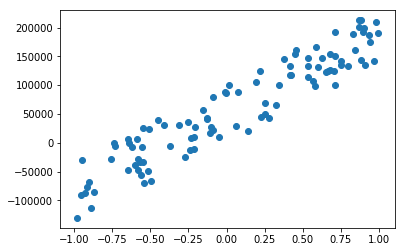

In [6]:
plt.scatter(X[:,0], Y)

Now, our goal is to find the correct value of \begin{align*}
A =\begin{bmatrix}
           a \\
           b \\
    \end{bmatrix}
\end{align*}
so that we can predict $Y$ for any new set of examples $X$. To do that we have to calculate something called error.

## Error

Now lets look at what values we could get for a random value of A. A = $\begin{align*}\begin{bmatrix}4112.\ 22000\end{bmatrix}\end{align*}$ gives the value as below.

Text(0,0.5,'Auction Price')

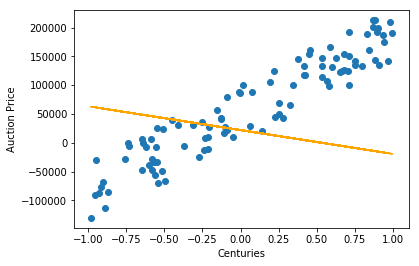

In [7]:
A=tensor([-41289.,22000])
plt.scatter(X[:,0], Y)
plt.plot(X[:,0], X@A,c="orange")
plt.xlabel('Centuries')
plt.ylabel('Auction Price')

Now we can clearly see that The Orange color line is way to far from actually predicting the auction price. Now, we have to define *far*. This is where error comes in. We want to give a number to how *far* it is from the actual result.

### Classical Error function

Now, just by looking into the data we would say the error is the difference between the actual value versus the predicted value. Well, That can be one of the error function. This can look like this: 

$J(a,b) = \sum_1^n(y-\hat{y} )$ 

   ** where ** J denotes the cost function, $a$ denotes the parameters which fit in A.

However, In practice we are using a different cost function (Note that error function and cost function dentotes the same). This is because if we magnify the error function a little bit, we converge to the correct value more than stating the actual value, using gradient descent. (This is proven to work in machines as well..). So, we take the error function as Mean Squared Error

### Mean Squared Error

Mean squared error basically takes the square value of the difference. So, The loss function changes to a little bit different.

$J(a,b) = \sum_1^n(y-\hat{y})^2$ 

So, we can create the function J as follows:

In [8]:
def mse(y_hat,y): return ((y_hat-y)**2).mean()

## Optimisation

Now that we have defined the error function, we are trying to define a way to optimize the value of A such that we reduce the error, intern predicting the value of $\hat{Y}$ (predicted value) closest the actual $Y$ (actual value). **Gradient Descent** is an algorithm which is used to reduce the value of a given function. The way it works is by taking the initial set of parameters $A$ and iteratively optimizing the value to minimize the function.


This iterative minimisation is achieved by taking individual steps in the negative direction of the gradient function. If you feel its hard to get, Just hang on. I would try to explain in brief later.

Now we define the that the parameters to be tuned is A

In [9]:
A = nn.Parameter(A); A

Parameter containing:
tensor([-41289.,  22000.], requires_grad=True)

In [10]:
def update():
    Y_hat = X@A
    loss = mse(Y,Y_hat)
    if t %10 ==0: print(loss) # We are asking to print the loss every 10 iterations
    loss.backward() # Calculates the gradient value
    with torch.no_grad(): # Saying that we dont want to back propogate thereby reducing the memory and time footprint.
        A.sub_(lr * A.grad) # Now we are making a tiny little step towards the minimum value. where lr is the learning rate
        A.grad.zero_() # We are resetting the gradient value to zero 

Here, we are calculating the gradient value using `loss.backward()` method. 

Then we say we are done with the calculation using `torch.backward()` using `torch.no_grad()`. This is more of a *Pytorch* thing, so that it can reduce the memory and processing power allocated the backward propogation task (calculating the gradients).

Then perform the following calculation:

\begin{equation} A = A-\alpha*dA \end{equation} where $\alpha$ is the *learning rate* and $dA$ is the change in A value as we move the value a bit(say 0.01). When $dA$ provides the slope, learning rate ($\alpha$) tells us how fast we must move. 

So, we are making a tiny step towards minimising the error and optimising the $A$ value.

A graphical representation of this could give us more clarity. We can discuss about it soon.

We are running the `update()` function 100 times so that we can move towards the actual value. 

In [11]:
lr = 1e-1
for t in range(100): update()

tensor(1.4036e+10, grad_fn=<MeanBackward1>)
tensor(3.2934e+09, grad_fn=<MeanBackward1>)
tensor(1.4071e+09, grad_fn=<MeanBackward1>)
tensor(9.9072e+08, grad_fn=<MeanBackward1>)
tensor(8.9762e+08, grad_fn=<MeanBackward1>)
tensor(8.7679e+08, grad_fn=<MeanBackward1>)
tensor(8.7213e+08, grad_fn=<MeanBackward1>)
tensor(8.7108e+08, grad_fn=<MeanBackward1>)
tensor(8.7085e+08, grad_fn=<MeanBackward1>)
tensor(8.7080e+08, grad_fn=<MeanBackward1>)


Now, we could see that the Loss value getting decreased gradually.

Lets plot the values ourselves to find out if we have converged to our solution

Text(0,0.5,'Auction Price')

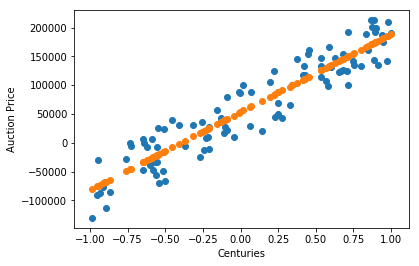

In [12]:
plt.scatter(X[:,0],Y)
plt.scatter(X[:,0],X@A)
plt.xlabel('Centuries')
plt.ylabel('Auction Price')

Yes, it seems it indeed converge to the solution. We can see that, we have taught the machine to learn the value of A, by itself. We can check if the value of A is what we used to generate the value of the dataset

In [13]:
A

Parameter containing:
tensor([135078.0156,  53438.6484], requires_grad=True)

It is indeed close. We can find that the value of $a$ is almost the same value as what we used. $b$ being a little different though. But this could have been caused due to the additional random value that we introduced while generating the dataset.


So, now if any new input or sets of inputs, on number of centuries (X) is given, it can find the auction price (Y) for it.

## Understanding using Graphs

Now, lets look at the values step by step to understand what was happening

### Impact of Iterations in prediction accuracy

In [14]:
from matplotlib import animation, rc
rc('animation',html='jshtml')

In [15]:
A =nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(X[:,0],Y,c='orange')
plt.xlabel('Centuries')
plt.ylabel('Auction Price')
line, = plt.plot(X[:,0],X@A)
plt.close()
def animate(i):
    update()
    line.set_ydata(X@A)
    return line,
animation.FuncAnimation(fig,animate,np.arange(0,100),interval=20)

Now we can clearly see that the arbitrary line that we just drew converged to the exact line that intended line. So, On each iteration of `update()` we see that the line turns one step closer to where we would intend the line to go towards. All we did was try to minimize the loss function and redraw the line by updating the $A$ value. This moves the line towards where we would like it to move towards. After `n` iterations (100 here), we see that it the loss becomes minimal and couldn't find a line that is can have a lower loss than the line above.   

### Loss Function Vs Value

The Loss Function shows how wrong the prediction is versus actual. Lets see the error rate along different values of $a$, considering $b$ as constant. 

In [16]:
b=22000.

In [17]:
mse_list=np.empty(shape=(2,0))

for a in range(124112,154112):
    A=tensor([a,b])
    Y_test=X@A
    mse_val=mse(Y,Y_test)
    mse_np=np.array([a,mse_val]).reshape([2,1])
    mse_list=np.append(mse_list,mse_np,axis=1)

Text(0,0.5,'Error')

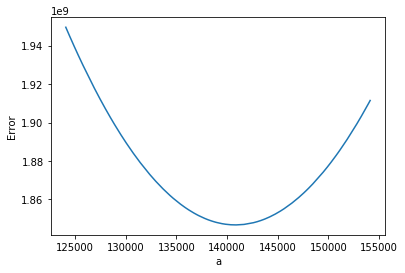

In [18]:
fig = plt.figure()
plt.plot(mse_list[0,:],mse_list[1,:])
plt.xlabel('a')
plt.ylabel('Error')

Now, we can see the value of Error. We can also relate that the value gets towards 0 as we reach an optimum value for $a$.

### Loss Function Vs Iterations

Now, lets look how the value of loss goes for this iterations of gradient descent.

In [19]:
def update():
    Y_hat = X@A
    loss = mse(Y,Y_hat)
    if t %10 ==0: print(loss)
    loss.backward()
    with torch.no_grad():
        A.sub_(lr * A.grad)
        A.grad.zero_()
    return loss

In [20]:
A =nn.Parameter(tensor(-1000.,2))
a_values=np.empty(shape=(2,0))
losses=np.empty(shape=(2,0))
for t in range(100):
    loss=update()
    loss_np=np.array([t,loss]).reshape([2,1])
    losses=np.append(losses,loss_np,axis=1)
    a_np=np.array([A[0],mse(Y,X@A)]).reshape([2,1])
    a_values=np.append(a_values,loss_np,axis=1)

tensor(1.1503e+10, grad_fn=<MeanBackward1>)
tensor(2.2840e+09, grad_fn=<MeanBackward1>)
tensor(1.1763e+09, grad_fn=<MeanBackward1>)
tensor(9.3902e+08, grad_fn=<MeanBackward1>)
tensor(8.8605e+08, grad_fn=<MeanBackward1>)
tensor(8.7420e+08, grad_fn=<MeanBackward1>)
tensor(8.7155e+08, grad_fn=<MeanBackward1>)
tensor(8.7095e+08, grad_fn=<MeanBackward1>)
tensor(8.7082e+08, grad_fn=<MeanBackward1>)
tensor(8.7079e+08, grad_fn=<MeanBackward1>)


Text(0,0.5,'Error')

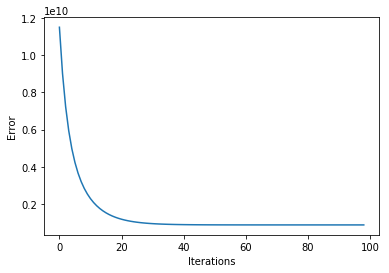

In [21]:
fig = plt.figure()
plt.plot(losses[0,:99],losses[1,:99])
plt.xlabel('Iterations')
plt.ylabel('Error')

Now, We could see that the Cost or Error reduces as the number of iterations increase. After a point, we no longer see a decrease in *error rate*. This error is due to the anonymity.

*Note* The post is mainly inspired from the [Fast AI](fast.ai) course.